사전 학습 모형을 통한 이미지 분류 - VGG16

In [11]:
from keras.applications.vgg16 import VGG16, preprocess_input, decode_predictions
from keras import utils
import numpy as np

# 모델 불러오기 VGG16
model = VGG16(weights='imagenet', include_top=True)


In [5]:
model.layers[0].input_shape

[(None, 224, 224, 3)]

In [33]:
# 1. 정사각형
#   1) 패딩
#   2) 크로핑
#   3) 와핑
# 2. resize <- 224, 299
# ---------------------
# 3. array 변환
# 4. 배치 차원 추가
# ---------------------
# 5. 기타 변환  x = preprocess_input(x)


# 이미지 로드, 크기 조정
img_path = 'dog_vector_crop.PNG'
img = utils.load_img(img_path, target_size=(224, 224)) # warping <--1, 2

target_size = 224
img = img.resize((target_size, target_size))

In [34]:
#  배열로 변환 <--3
x = utils.img_to_array(img)

# 배치 차원 추가, 모델의 입력 포맷이 여러 개의 샘플을 한 번에 처리할 수 있도록 배치(batch)로 입력받음 <-- 4
x = np.expand_dims(x, axis=0)

In [35]:
x.shape

(1, 224, 224, 3)

In [36]:
# 이미지 전처리 <-- 5 기타변환
x = preprocess_input(x)  # 5. 모델 훈련 시와 동일하게 입력 데이터 스케일링 ex) 픽셀 값 범위 [-1, 1]로 정규화


In [37]:
predictions = model.predict(x)
print('Predicted:', decode_predictions(predictions, top=3)[0])

1/1 [==============================] - 0s 26ms/step
Predicted: [('n02108551', 'Tibetan_mastiff', 0.24305648), ('n02113624', 'toy_poodle', 0.09174496), ('n02112137', 'chow', 0.08656245)]


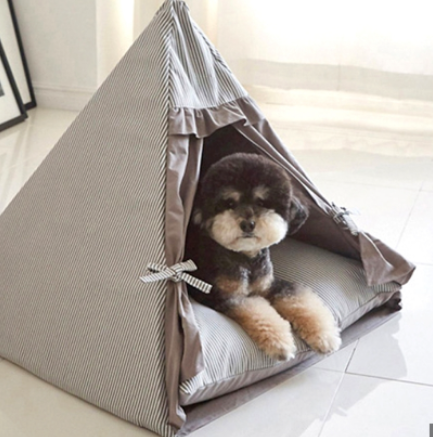

사전학습 모형을 통한 이미지 분류 - Inception

In [38]:
from keras.applications.inception_v3 import InceptionV3, preprocess_input as preprocess_input_inception
from keras.applications.resnet import ResNet50, preprocess_input as preprocess_input_resnet
from keras.preprocessing import image
import numpy as np


In [39]:
# InceptionV3 model 로드
model_inception = InceptionV3(weights='imagenet', include_top=True)


In [41]:
# 이미지 로드 및 사이즈 조정
img_path = 'dog_vector_crop.PNG'

Inception_img = utils.load_img(img_path, target_size=(299, 299))

In [42]:
# 배열로 변환
x = utils.img_to_array(Inception_img)

# 배치 차원 추가
x = np.expand_dims(x, axis=0)

# 이미지 전처리 (InceptionV3용)
x_inception = preprocess_input_inception(x.copy())


In [43]:
from keras.applications.inception_v3 import decode_predictions

# 이미지 분류 예측
predictions_inception = model_inception.predict(x_inception)


# 예측 결과
print('InceptionV3 Predicted:', decode_predictions(predictions_inception, top=3)[0])


1/1 [==============================] - 1s 1s/step
InceptionV3 Predicted: [('n02113624', 'toy_poodle', 0.20578955), ('n02086240', 'Shih-Tzu', 0.101324566), ('n02098413', 'Lhasa', 0.1002221)]


사전학습 모형을 통한 이미지 분류 - ResNet

In [44]:
from keras.applications.inception_v3 import InceptionV3, preprocess_input as preprocess_input_inception
from keras.applications.resnet import ResNet50, preprocess_input as preprocess_input_resnet
from keras.preprocessing import image
import numpy as np


In [45]:
#  ResNet50 model 로드
model_resnet = ResNet50(weights='imagenet', include_top=True)


In [46]:
# 이미지 로드 및 사이즈 조정
img_path = 'dog_vector_crop.PNG'

resnet_img = utils.load_img(img_path, target_size=(224, 224))

In [47]:
# 배열로 변환
x = utils.img_to_array(resnet_img)

# 배치 차원 추가
x = np.expand_dims(x, axis=0)

# 이미지 전처리 (ResNet50)
x_resnet = preprocess_input(x.copy())

In [48]:
predictions_resnet = model_resnet.predict(x_resnet)
print('ResNet50 Predicted:', decode_predictions(predictions_resnet, top=3)[0])

1/1 [==============================] - 1s 1s/step
ResNet50 Predicted: [('n02108551', 'Tibetan_mastiff', 0.99068415), ('n02097474', 'Tibetan_terrier', 0.0071126926), ('n02113624', 'toy_poodle', 0.0013467463)]
